# Import module

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
[fm.FontProperties(fname=font).get_name() for font in font_list]

In [3]:
from pyproj import Transformer
import pyproj
from shapely.geometry import Point as point
import geopandas as gpd
import folium

In [4]:
plt.rcParams["font.family"] = 'NanumGothic'

In [ ]:
print(fm.findSystemFonts(fontpaths=None, fontext='ttf'))

In [6]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  #font 경로 설정
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [ ]:
# mpl.rcParams['axes.unicode_minus'] = False

In [7]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.5.3
설치 위치:  /home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/matplotlib/__init__.py
설정 위치:  /home/dhc4003/.config/matplotlib
캐시 위치:  /home/dhc4003/.cache/matplotlib


In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from geopy.distance import geodesic
from plotnine import *

# 2022년도 따릉이 데이터(1월 ~6월) 바탕으로 EDA

## 2022년도 데이터 만들기

In [36]:
df_2022=pd.read_csv('/home/dhc4003/ddareung/data/seoul_bike_2022.csv',low_memory=False)

In [107]:
df_rent_group = df_2022.groupby(["대여일자", "대여연월", "대여연도", "대여월", "대여일", "대여요일"])["대여일시"].count()
df_rent = pd.DataFrame(df_rent_group).reset_index()
df_rent.columns = ["대여일자", "대여연월", "대여연도", 
                   "대여월", "대여일", "대여요일", "대여수"]
df_rent.head()

대여일자     대여연월  대여연도  대여월  대여일  대여요일    대여수
0  2022-01-01  2022-01  2022    1    1     5  28794
1  2022-01-02  2022-01  2022    1    2     6  28551
2  2022-01-03  2022-01  2022    1    3     0  52805
3  2022-01-04  2022-01  2022    1    4     1  55522
4  2022-01-05  2022-01  2022    1    5     2  56557

<AxesSubplot:xlabel='대여일자'>

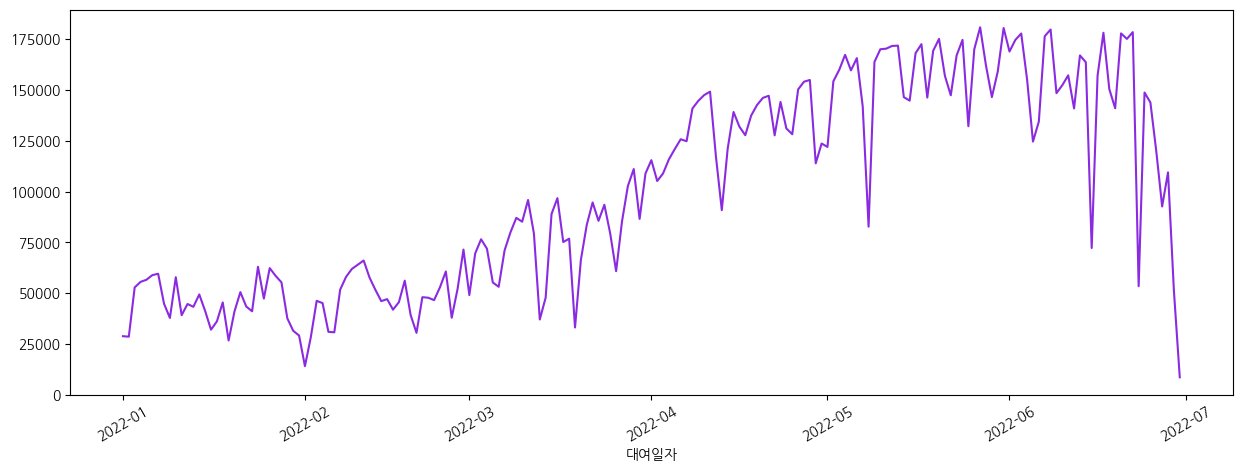

In [108]:
# 일자별 대여량 확인하기
df_rent.groupby('대여일자')['대여수'].mean().plot(rot=30, figsize=(15, 5) ,color='blueviolet')

<AxesSubplot:xlabel='대여연월', ylabel='대여수'>

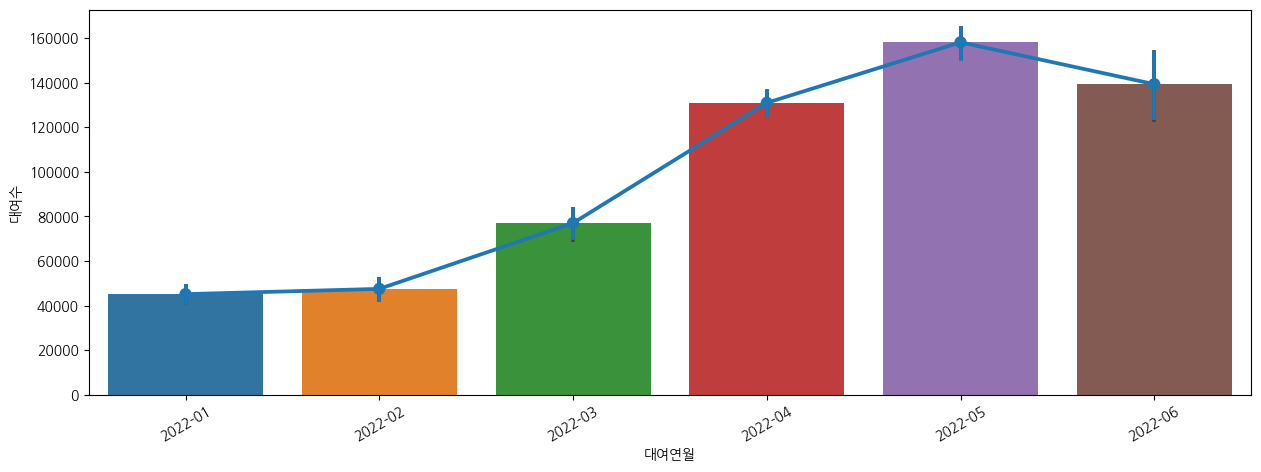

In [109]:
# 월별 대여량 확인하기
plt.figure(figsize=(15, 5))
plt.xticks(rotation=30)
sns.barplot(data=df_rent, x="대여연월", y="대여수")
sns.pointplot(data=df_rent, x="대여연월", y="대여수")

In [ ]:
### 보니까 대여소가 102번호 이상인거부터 5855 이하까지 유효
df_2022=df_2022[(df_2022.loc[:,'대여대여소']>=102) & (df_2022.loc[:,'대여대여소']<=5855) & (df_2022.loc[:,'반납대여소']>=102) & (df_2022.loc[:,'반납대여소']<=5855)]
df_2022.tail()

In [38]:
df_2022["대여연월"] = df_2022["대여일시"].apply(lambda x : x[:7])
df_2022["대여일시"]=pd.to_datetime(df_2022["대여일시"])

df_2022["대여연도"] = df_2022["대여일시"].dt.year
df_2022["대여월"] = df_2022["대여일시"].dt.month
df_2022["대여일"] = df_2022["대여일시"].dt.day
df_2022["대여시간"] = df_2022["대여일시"].dt.hour
df_2022["대여요일"] = df_2022["대여일시"].dt.dayofweek
df_2022["대여일자"] = df_2022["대여일시"].dt.date

df_2022["반납연월"] = df_2022["반납일시"].apply(lambda x : x[:7])
df_2022["반납일시"]=pd.to_datetime(df_2022["반납일시"])

df_2022["반납일시"]=pd.to_datetime(df_2022["반납일시"])
df_2022["반납연도"] = df_2022["반납일시"].dt.year
df_2022["반납월"] = df_2022["반납일시"].dt.month
df_2022["반납일"] = df_2022["반납일시"].dt.day
df_2022["반납시간"] = df_2022["반납일시"].dt.hour
df_2022["반납요일"] = df_2022["반납일시"].dt.dayofweek
df_2022["반납일자"] = df_2022["반납일시"].dt.date

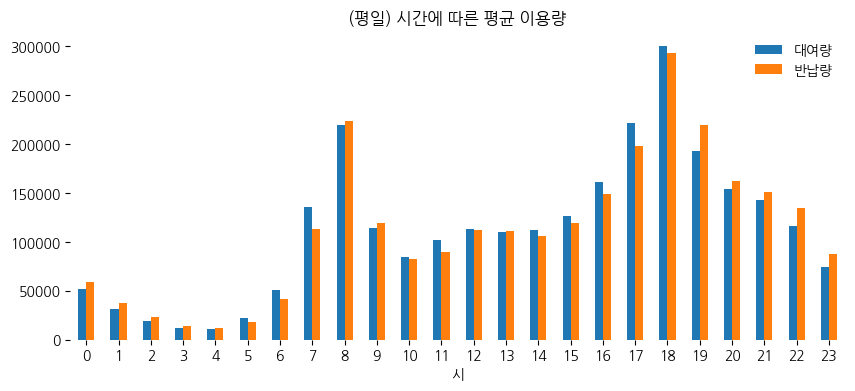

In [110]:
# 평일의 시간에 따른 사용량 살펴보기

ax = pd.DataFrame(
    data={
        "대여량": df_2022[df_2022['대여요일'] < 5].groupby('대여시간').size() // 5,
        "반납량": df_2022[df_2022['대여요일'] < 5].groupby('반납시간').size() // 5
    }
).plot.bar(
    rot=0,
    xlabel="시",
    title="(평일) 시간에 따른 평균 이용량",
    figsize=(10, 4)
)
ax.set_frame_on(False)
ax.legend(frameon=False)

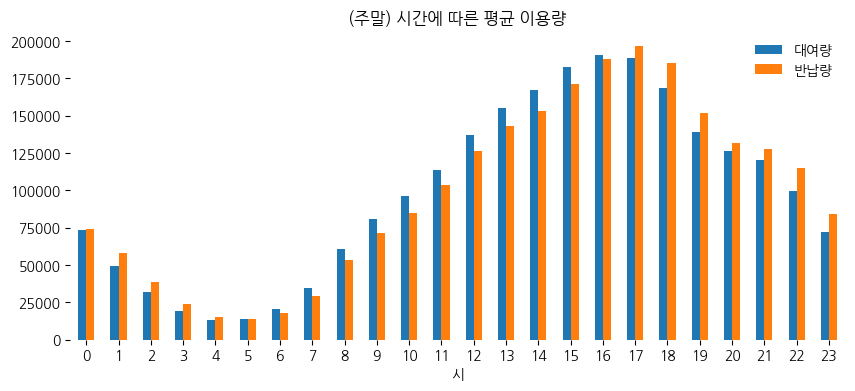

In [111]:
# 주말의 시간에 따른 사용량 살펴보기
ax = pd.DataFrame(
    data={
        "대여량": df_2022[df_2022['대여요일'] >= 5].groupby('대여시간').size() // 2,
        "반납량": df_2022[df_2022['대여요일'] >= 5].groupby('반납시간').size() // 2
    }
).plot.bar(
    rot=0,
    xlabel="시",
    title="(주말) 시간에 따른 평균 이용량",
    figsize=(10, 4)
)
ax.set_frame_on(False)
ax.legend(frameon=False);

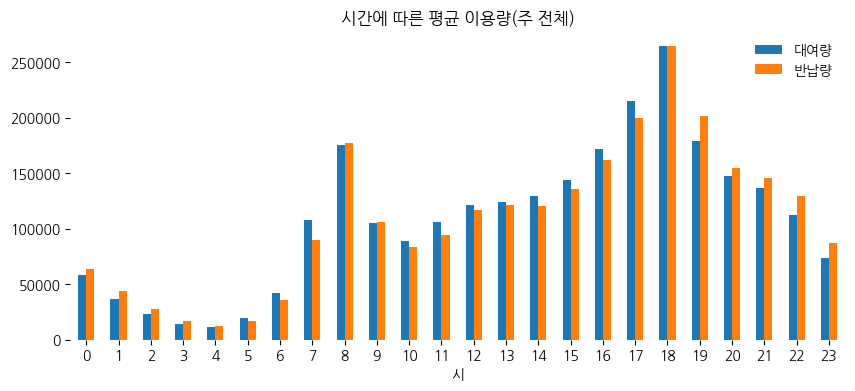

In [18]:
# 시간대별 이용량 살펴보기
ax = pd.DataFrame(
    data={
        "대여량": df_2022.groupby('대여시간').size() // 7,
        "반납량": df_2022.groupby('반납시간').size() // 7
    }
).plot.bar(
    rot=0,
    xlabel="시",
    title="시간에 따른 평균 이용량(주 전체)",
    figsize=(10, 4)
)
ax.set_frame_on(False)
ax.legend(frameon=False);

평일의 경우, 대여/반납 시간대가 모두 8시와 18시에 몰려있다. 주로 출퇴근 시간에 몰린듯 하다.

주말의 경우, 밤시간대로 갈수록 몰린다. 주로 18시 전후로 최고치를 찍는다.

한편, 출근시간 제외하고, 일반적으로 낮에는 대여량 > 반납량이고, 밤에는 그 반대다.

## 지역별 대여 반납 비율 파악하기

In [39]:
### 거치소 dataframe
rental_df=pd.read_csv('./rental_spot.csv',low_memory=False,encoding='cp949')
del rental_df['LCD']
del rental_df['QR']
# rental_df_gu: 대여한 대여소번호의 자치구
rental_df_gu=rental_df[['대여소번호','자치구']]
rental_df_gu.columns=['대여대여소','대여지역']
# return_df_gu: 반납한 반납소번호의 자치구
return_df_gu=rental_df[['대여소번호','자치구']]
return_df_gu.columns=['반납대여소','반납지역']

반납대여소  반납지역
0       102   마포구
1       103   마포구
2       104   마포구
3       105   마포구
4       106   마포구
...     ...   ...
2648   5851  영등포구
2649   5852  영등포구
2650   5853  영등포구
2651   5854  영등포구
2652   5855  영등포구

[2653 rows x 2 columns]

In [ ]:
### 2022 dataframe과 대여소번호, 반납소번호를 key로 삼아 자치구만 추가해주기
df_2022=pd.merge(left = df_2022 , right = rental_df_gu, how = "inner", on = "대여대여소")
df_2022=pd.merge(left = df_2022 , right = return_df_gu, how = "inner", on = "반납대여소")
df_2022.isnull().sum()

In [ ]:
#대여지역구와 반납지역구가 다른 경우(유입 유출 파악 위해)
df_2022[df_2022['대여지역']!=df_2022['반납지역']]

In [112]:
# 대여지역, 대여시간을 기준으로 대여량 확인
rental_by_time_region= df_2022[df_2022['대여요일'] < 5].groupby(['대여지역', '대여시간']).size() // 5
rental_by_time_region

대여지역  대여시간
강남구   0       1617
      1       1050
      2        723
      3        478
      4        329
              ... 
중랑구   19      5725
      20      4806
      21      4522
      22      3686
      23      2579
Length: 600, dtype: int64

In [113]:
# 대여시간대별이 column이 됨
rental_by_time_region_table = rental_by_time_region.unstack()
rental_by_time_region_table.head()

대여시간    0     1     2    3    4     5     6      7      8      9   ...     14  \
대여지역                                                               ...          
강남구   1617  1050   723  478  329   555  1347   3165   5438   3476  ...   3522   
강동구   2269  1319   848  529  462  1304  2885   6661   9025   4643  ...   4674   
강북구   1140   807   581  418  335   427   783   1559   2506   1599  ...   1749   
강서구   4136  2433  1473  909  950  2390  6749  19116  30931  13242  ...  11570   
관악구   2236  1366   976  650  539   810  1429   3520   5519   3063  ...   2908   

대여시간     15     16     17     18     19     20     21     22    23  
대여지역                                                                
강남구    4079   5404   8174  10629   5941   4332   3857   3111  1976  
강동구    5229   6820   8707  11220   8445   6795   6535   5156  3283  
강북구    2043   2428   2988   3946   2847   2469   2378   1948  1454  
강서구   13374  17135  24348  34357  21940  16700  15177  12028  7150  
관악구    3223   3877   5076   6967   5751   5073   4899   4340  3058  

[5 rows x 24 columns]

Text(158.75347222222223, 0.5, '')

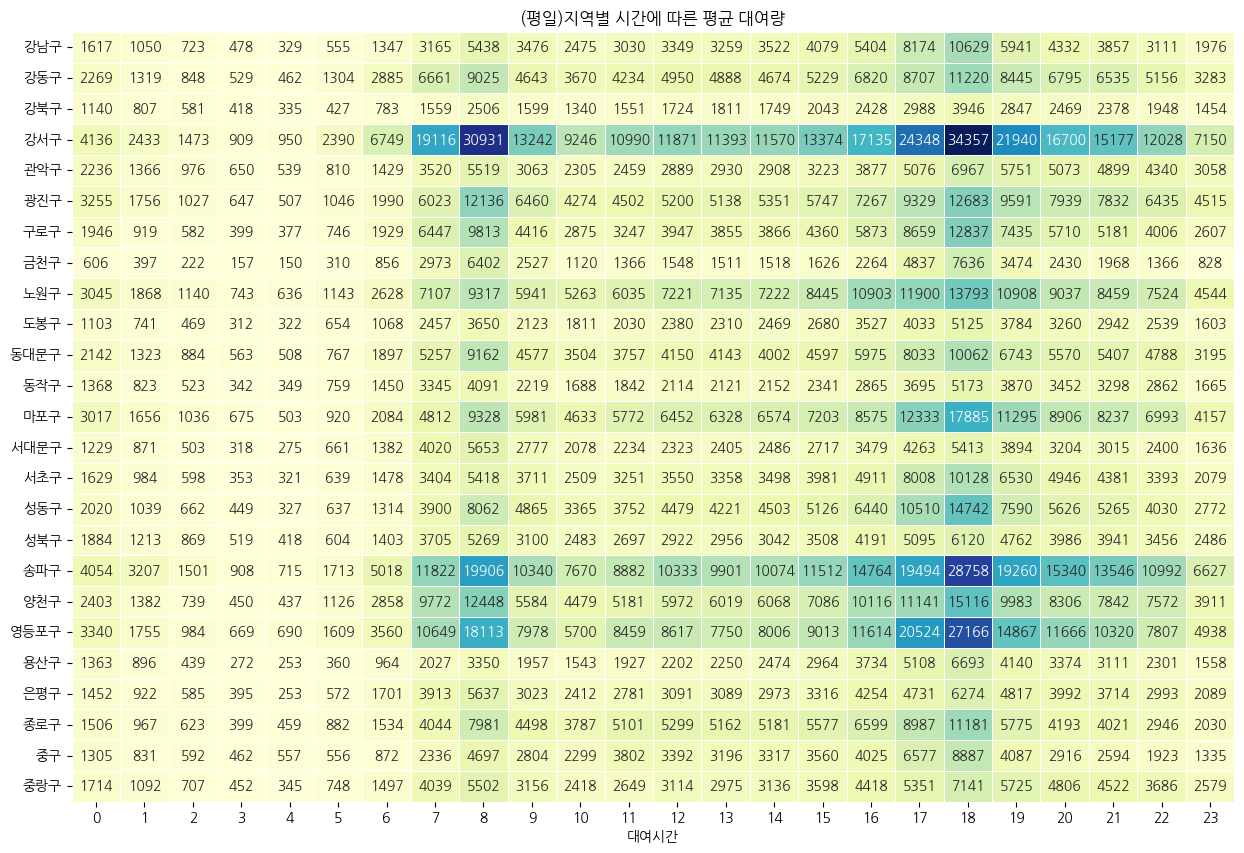

In [114]:
_, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(rental_by_time_region_table,
    annot=True,
    fmt='d',
    cmap="YlGnBu",
    cbar=False,
    linewidth=0.5,
    ax=ax
)
ax.set_title("(평일)지역별 시간에 따른 평균 대여량")
ax.set_ylabel("")

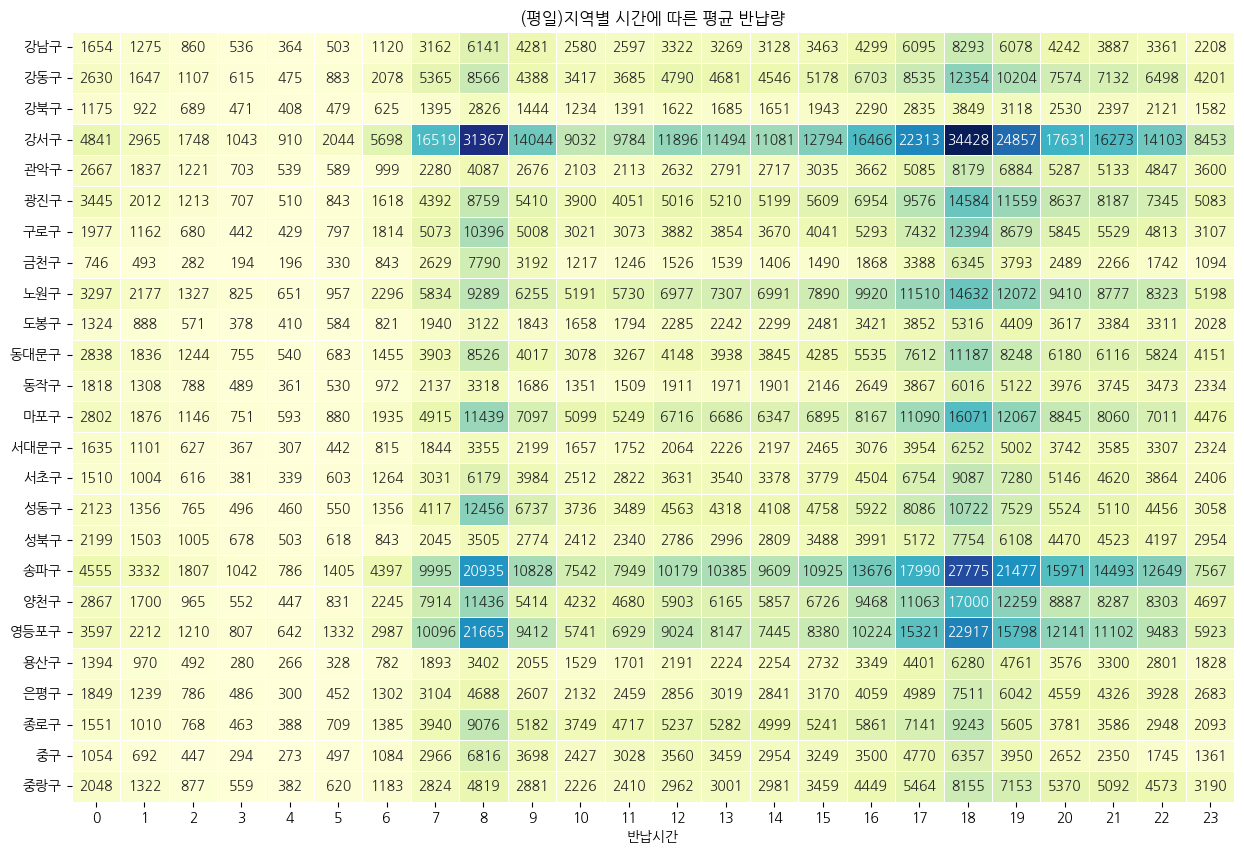

In [124]:
return_by_time_region=df_2022[df_2022['반납요일'] < 5].groupby(['반납지역', '반납시간']).size() // 5
return_by_time_region_table =return_by_time_region.unstack()

_, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(return_by_time_region_table,
    annot=True,
    fmt='d',
    cmap="YlGnBu",
    cbar=False,
    linewidth=0.5,
    ax=ax
)
ax.set_title("(평일)지역별 시간에 따른 평균 반냡량")
ax.set_ylabel("");

강서구, 송파구, 영등포구 공통적으로 대여, 반납 많음

출퇴근 시간에 공통적으로 색이 진하게 그려져 있음

그러면 출퇴근 시간에 대여량이 반납량보다 높은지역은?

반대로 반납량이 대여량보다 많은 지역은?

In [126]:
# 대여량 8시, 18시
rent_at_8and18 = pd.DataFrame(
    data=[rental_by_time_region.xs(8, level=1),rental_by_time_region.xs(18, level=1)], index=[8, 18]
)
rent_at_8and18

대여지역    강남구    강동구   강북구    강서구   관악구    광진구    구로구   금천구    노원구   도봉구  ...  \
8      5438   9025  2506  30931  5519  12136   9813  6402   9317  3650  ...   
18    10629  11220  3946  34357  6967  12683  12837  7636  13793  5125  ...   

대여지역    성동구   성북구    송파구    양천구   영등포구   용산구   은평구    종로구    중구   중랑구  
8      8062  5269  19906  12448  18113  3350  5637   7981  4697  5502  
18    14742  6120  28758  15116  27166  6693  6274  11181  8887  7141  

[2 rows x 25 columns]

In [128]:
# 반납량 8시, 18시
rtrn_at_8and18 = pd.DataFrame(
    data = [return_by_time_region.xs(8, level=1), return_by_time_region.xs(18, level=1)], index=[8, 18]
)
rtrn_at_8and18

반납지역   강남구    강동구   강북구    강서구   관악구    광진구    구로구   금천구    노원구   도봉구  ...  \
8     6141   8566  2826  31367  4087   8759  10396  7790   9289  3122  ...   
18    8293  12354  3849  34428  8179  14584  12394  6345  14632  5316  ...   

반납지역    성동구   성북구    송파구    양천구   영등포구   용산구   은평구   종로구    중구   중랑구  
8     12456  3505  20935  11436  21665  3402  4688  9076  6816  4819  
18    10722  7754  27775  17000  22917  6280  7511  9243  6357  8155  

[2 rows x 25 columns]

In [129]:
# 전체에서 대여 반납이 차지하는 비율 파악하기
total =rent_at_8and18 + rtrn_at_8and18
rent_at_8and18=rent_at_8and18 / total
rtrn_at_8and18=rtrn_at_8and18/total

In [130]:
# 출근시간 8시에서의 대여 반납량 차이
morning_diff = pd.DataFrame(
    data={'대여': rent_at_8and18.loc[8], '반납': rtrn_at_8and18.loc[8]}
).sort_values('대여')
# 퇴근시간 18시에서의 대여 반납량 차이
dinner_diff = pd.DataFrame(
    data={'대여': rent_at_8and18.loc[18], '반납': rtrn_at_8and18.loc[18]}
).sort_values('대여')

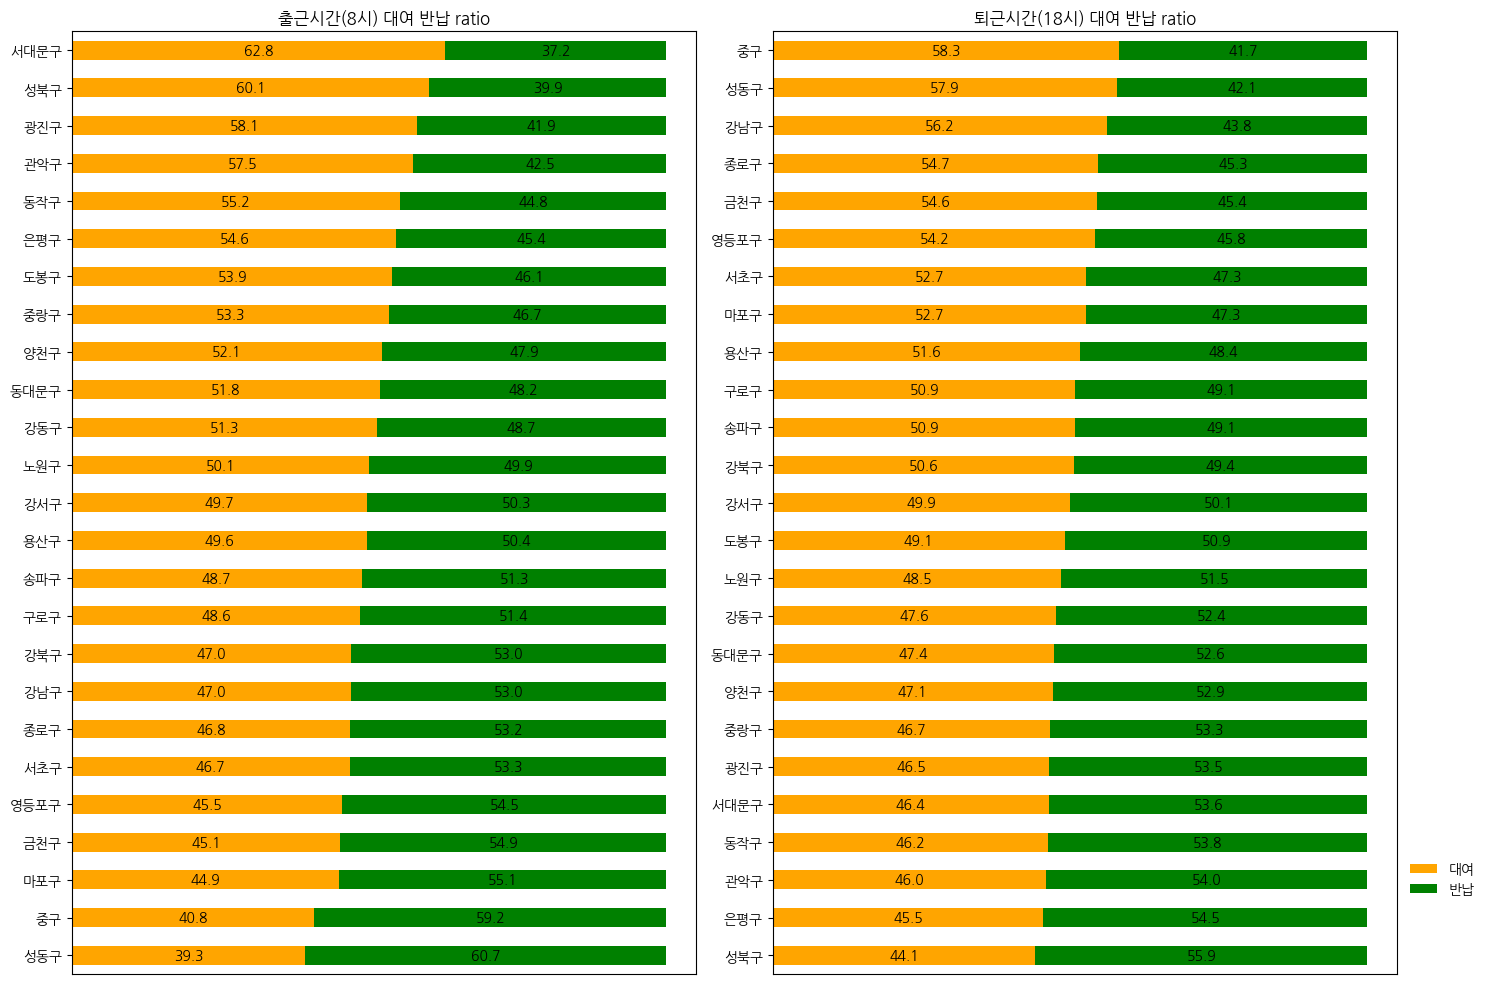

In [140]:
_, axes = plt.subplots(1, 2, figsize=(15, 10))

for i, (diff, time_name) in enumerate(zip([morning_diff, dinner_diff], ["출근시간(8시)", "퇴근시간(18시)"])):
    ax = diff.plot.barh(
        stacked=True,
        color=['orange', 'green'],
        title=f"{time_name} 대여 반납 ratio",
        ax=axes[i]
    )
    # patches는 막대기를 의미하는거
    for p in ax.patches: 
        x, y, width, height = p.get_bbox().bounds 
        ax.annotate("%.1f"%(width*100), (x+width/2, y+height/2), ha='center', va='center')
    ax.set_xticks([])


axes[0].get_legend().remove()
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.1), frameon=False)
_.tight_layout()

출근시간엔 서대문구가 대여가 25퍼 더 많음

중구, 성동구에서 아침에는 반납량이 많고 저녁에는 대여량이 많음


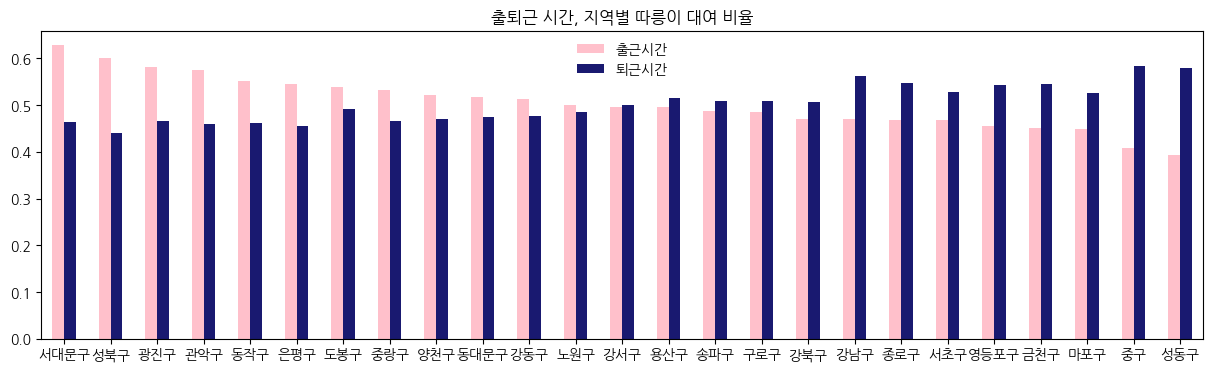

In [141]:
morning_dinner_diff = pd.DataFrame(
    data={'출근시간': morning_diff['대여'], '퇴근시간': dinner_diff['대여']}
).sort_values('출근시간', ascending=False)

ax = morning_dinner_diff.plot.bar(
    rot=0,
    color=['pink', 'midnightblue'],
    title="출퇴근 시간, 지역별 따릉이 대여 비율",
    figsize=(15, 4)
)
ax.legend(frameon=False);

출근시간 대여가 높은 지역(서대문구, 성북구,광진구 등)-> 거주지->근무지로 이동하는 것, 따라서 거주지역의 출근시간 대여량이 높음

퇴근시간 대여가 높은 지역(강남구, 종로구, 서초구, 영등포구, 금천구, 마포구, 중구, 성동구)-> 퇴근시간 대여량이 높음. 근무지->거주지로 이동

## 유출, 유입 많은 지역 살펴보기


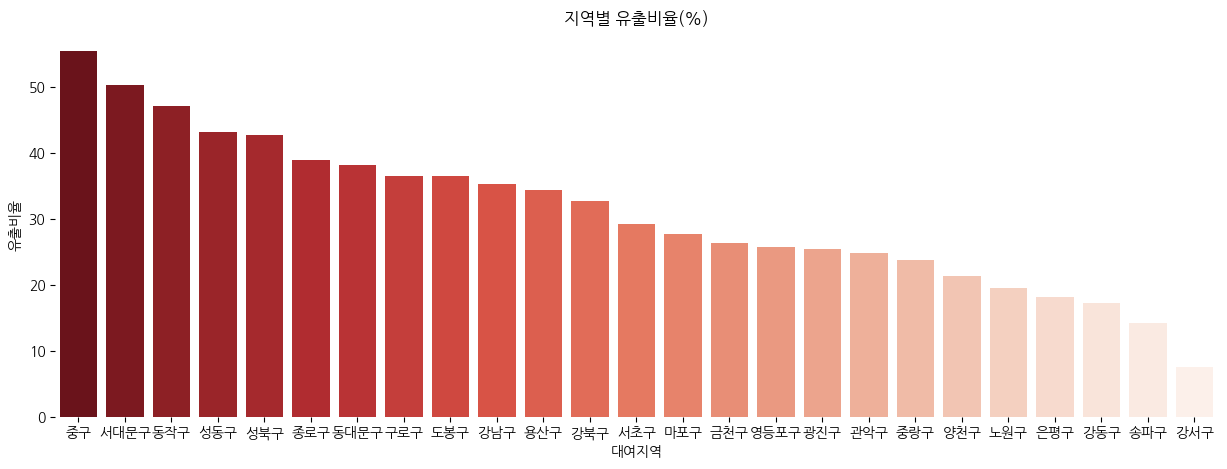

In [65]:
# 유출비율 = A지역 대여 후 타 지역에 반납한 량 / A지역 총 대여량
# 유입비율 = 타 지역에서 대여 후 A지역에 반납한 량 / A지역 총 반납량
# 유출비율

outflow_by_region = df_2022[['대여지역', '반납지역']].groupby('대여지역').apply(
    lambda df_2022: (df_2022['대여지역'] != df_2022['반납지역']).sum() / len(df_2022) * 100
).sort_values(ascending=False)

outflow_by_region.name = '유출비율'
outflow_by_region

_, ax = plt.subplots(figsize=(15, 5))
sns.barplot(
    x='대여지역',
    y='유출비율',
    data=outflow_by_region.reset_index(),
    order=outflow_by_region.index,
    palette='Reds_r'
)
ax.set_title("지역별 유출비율(%)")
ax.set_frame_on(False)


In [75]:
import json
geo_path = './seoul_municipalities_geo_simple.json'
with open(geo_path,encoding='utf-8') as fp:
    geo_str = json.load(fp)

In [78]:
bike_map = folium.Map(
    location=[37.541, 126.986],
    zoom_start=10,
    tiles='CartoDB positron',
    zoom_control=False
)
folium.Choropleth(geo_str,
    data=outflow_by_region,
    key_on='feature.properties.SIG_KOR_NM', 
    fill_color='Reds',
    line_color='grey',
    line_opacity=0.5
).add_to(bike_map)
bike_map

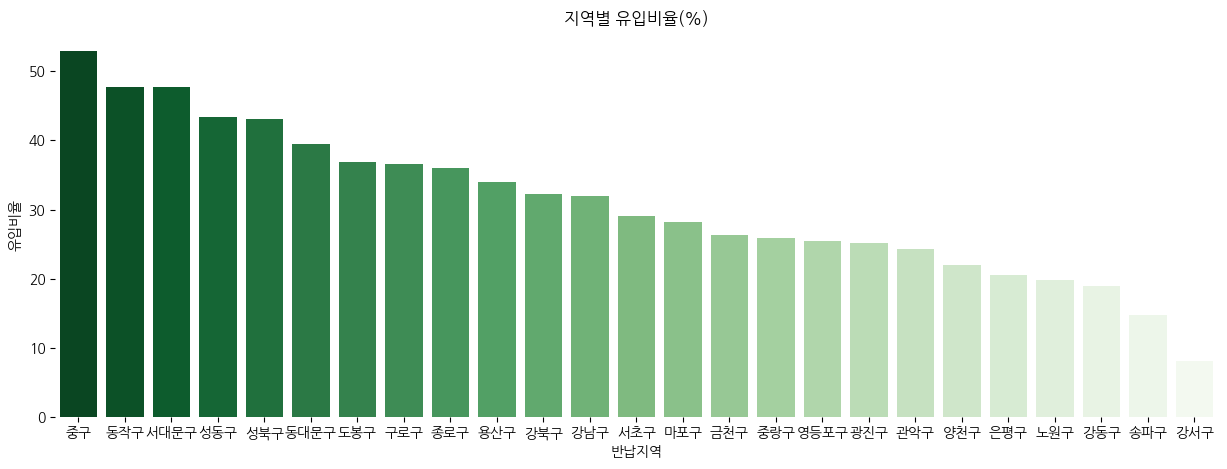

In [79]:
# 유입비율

inflow_by_region = df_2022[['대여지역', '반납지역']].groupby('반납지역').apply(
    lambda df_2022: (df_2022['대여지역'] != df_2022['반납지역']).sum() / len(df_2022) * 100
).sort_values(ascending=False)

inflow_by_region.name = '유입비율'
inflow_by_region

_, ax = plt.subplots(figsize=(15, 5))
sns.barplot(
    x='반납지역',
    y='유입비율',
    data=inflow_by_region.reset_index(),
    order=inflow_by_region.index,
    palette='Greens_r'
)
ax.set_title("지역별 유입비율(%)")
ax.set_frame_on(False)

In [80]:
bike_map = folium.Map(
    location=[37.541, 126.986],
    zoom_start=10.8,
    tiles='CartoDB positron',
    zoom_control=False
)
folium.Choropleth(geo_str,
    data=inflow_by_region,
    key_on='feature.properties.SIG_KOR_NM', 
    fill_color='Greens',
    line_color='grey',
    line_opacity=0.5
).add_to(bike_map)
bike_map

In [81]:
# [흠시] 유출이 많을수록, 유입이 많은걸까?

inoutflow_by_region = pd.DataFrame(
    data={'유출비율': outflow_by_region, '유입비율': inflow_by_region}
).sort_values(by='유출비율', ascending=False)
inoutflow_by_region.head()

유출비율       유입비율
중구    55.471180  52.976555
서대문구  50.316474  47.726057
동작구   47.023673  47.774885
성동구   43.111595  43.384966
성북구   42.732069  43.138240

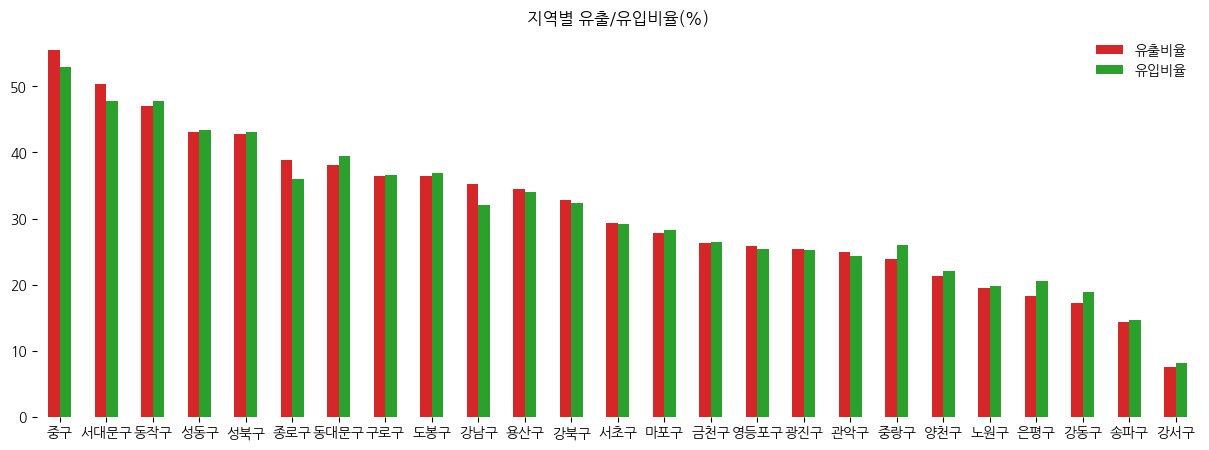

In [82]:
ax = inoutflow_by_region.plot(
    kind='bar',
    rot=0,
    color=['C3', 'C2'], # red, green
    figsize=(15, 5)
)
ax.set_title("지역별 유출/유입비율(%)")
ax.legend(frameon=False)
ax.set_frame_on(False)

In [84]:
from folium import plugins

In [85]:
# 왼쪽(빨간색)은 유출비율, 오른쪽(초록색)은 유입비율을 나타낸다.

bike_map = folium.plugins.DualMap(
    location=[37.541, 126.986],
    zoom_start=10.8,
    tiles='CartoDB positron',
    zoom_control=False
)
folium.Choropleth(geo_str,
    data=outflow_by_region,
    key_on='feature.properties.SIG_KOR_NM', 
    fill_color='Reds',
    line_color='grey'
).add_to(bike_map.m1)
folium.Choropleth(geo_str,
    data=inflow_by_region,
    key_on='feature.properties.SIG_KOR_NM', 
    fill_color='Greens',
    line_color='grey'
).add_to(bike_map.m2)
bike_map

In [86]:
inoutflow_by_region.corr()

유출비율     유입비율
유출비율  1.00000  0.99389
유입비율  0.99389  1.00000

유출비율과 유입비율은 거의 동일한 분포를 가진다. 즉 유출비율이 높은 지역은 유입비율도 높다. 상관계수 1에 수렴


In [87]:
df_weekday = df_2022[df_2022['대여요일'] < 5]

outflow_by_region_weekday = df_weekday.groupby('대여지역').apply(
    lambda x: x[x['대여지역'] != x['반납지역']].groupby('대여시간').size() \
               / x.groupby('대여시간').size() * 100
)
outflow_by_region_weekday.head()

대여시간         0          1          2          3          4          5   \
대여지역                                                                     
강남구   38.820183  35.617742  36.780973  37.886383  33.474833  34.870317   
강동구   18.285160  17.171870  16.148043  17.742544  25.021608  24.172287   
강북구   39.400316  36.363636  37.035763  39.837398  44.338498  33.193081   
강서구   10.671115  11.875411  13.804805  16.728951  14.934792   7.044846   
관악구   21.017798  20.119988  19.971323  23.977867  32.209044  34.739699   

대여시간         6          7          8          9   ...         14         15  \
대여지역                                              ...                         
강남구   25.244880  29.656305  29.863205  21.559264  ...  30.288407  33.462425   
강동구   24.714038  18.711905  20.031025  16.810957  ...  15.579137  15.924736   
강북구   36.820618  35.561257  29.952115  33.900213  ...  30.288132  29.399100   
강서구    8.198761   7.541248   4.893473   5.583496  ...   7.082109   6.841428   
관악구   31.621659  39.798875  43.627931  28.164784  ...  23.947730  23.531236   

대여시간         16         17         18         19         20         21  \
대여지역                                                                     
강남구   36.883790  43.132218  48.174839  41.437468  38.563449  35.993156   
강동구   15.524927  17.366837  16.816983  14.792185  16.260043  17.249610   
강북구   33.042332  32.394083  36.993868  31.846597  31.038951  32.352199   
강서구    7.332361   8.421226   8.975702   6.788390   6.797605   6.960441   
관악구   23.162239  24.065246  24.680656  20.532703  21.601167  20.772276   

대여시간         22         23  
대여지역                        
강남구   37.547400  36.356275  
강동구   13.812498  13.364196  
강북구   34.969199  36.463633  
강서구    7.151646   8.052246  
관악구   20.720638  20.589774  

[5 rows x 24 columns]

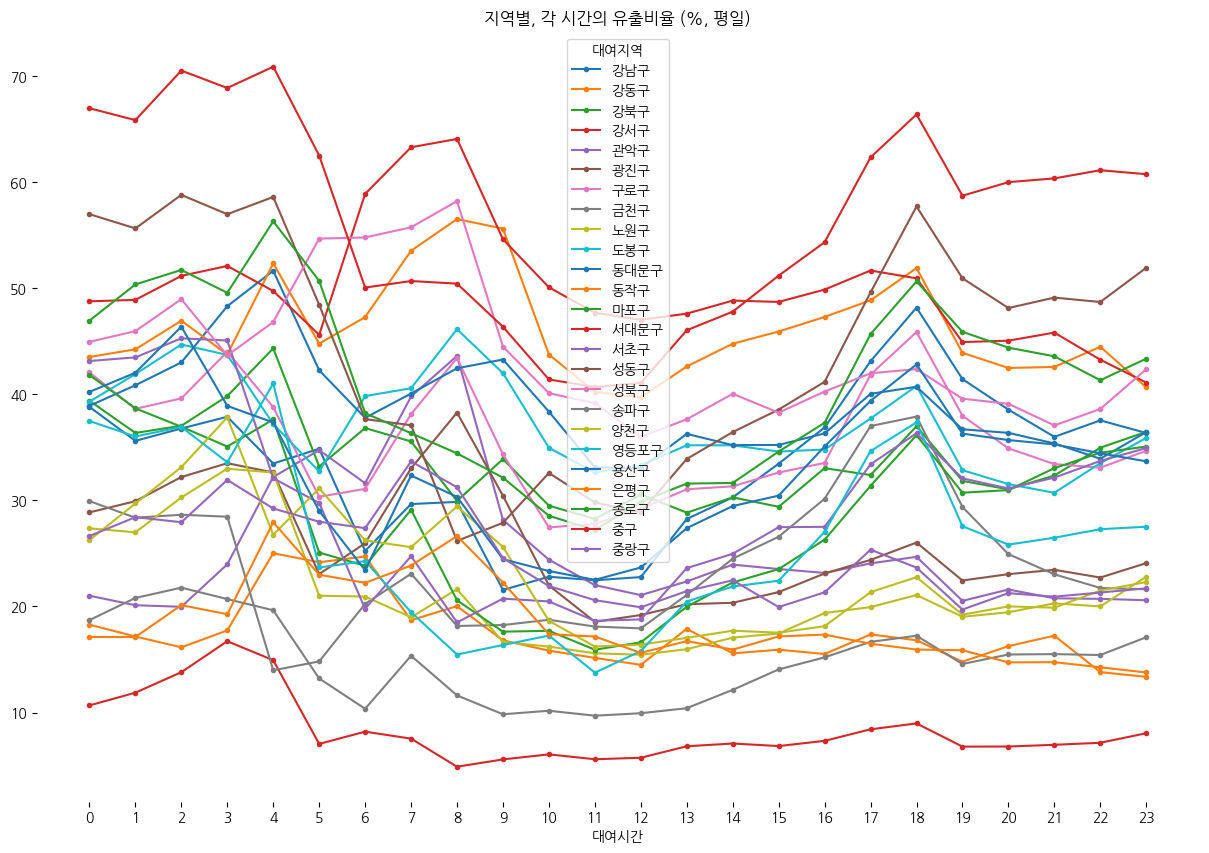

In [88]:
ax = outflow_by_region_weekday.T.plot.line(
    style='.-',
    rot=0,
    xticks=range(24),
    title="지역별, 각 시간의 유출비율 (%, 평일)",
    figsize=(15, 10)
)
ax.set_frame_on(False)

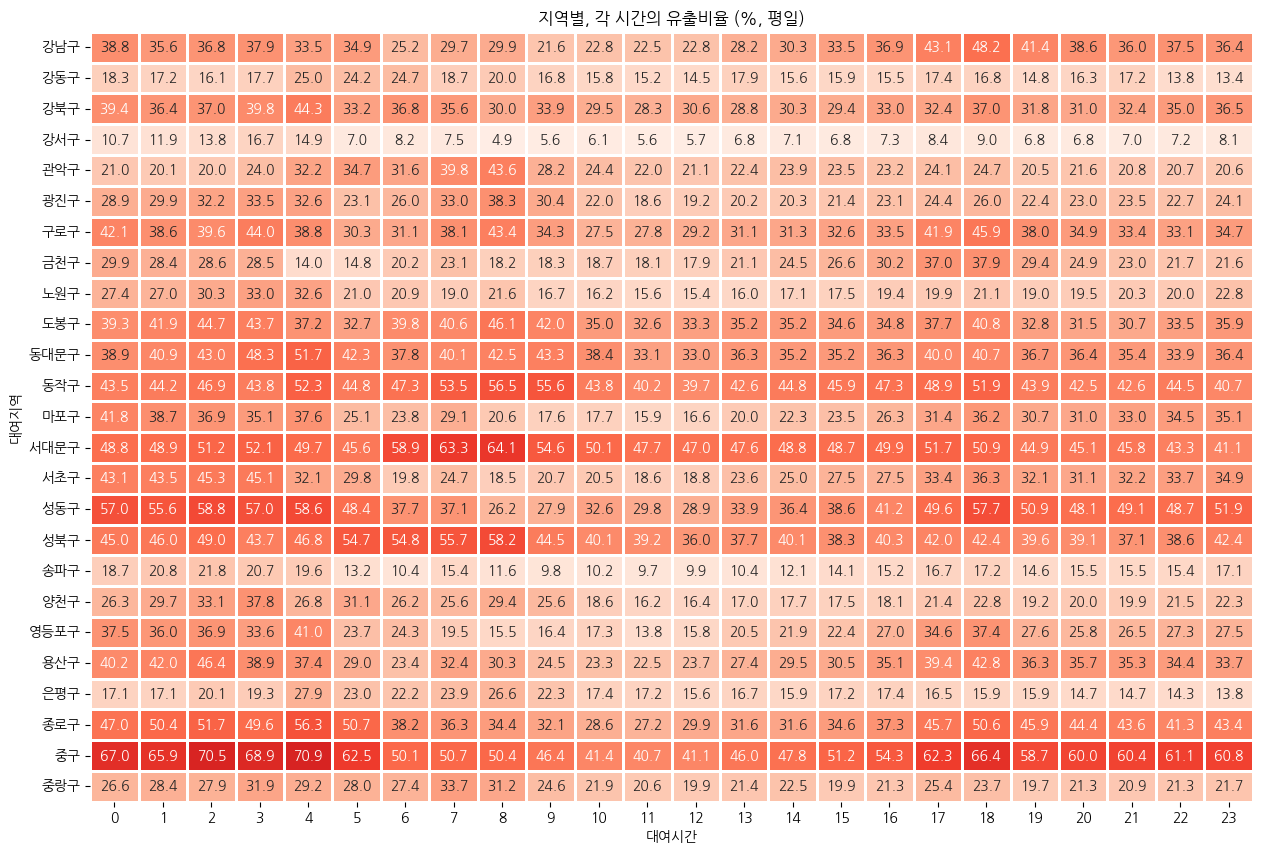

In [89]:
_, ax = plt.subplots(figsize=(15,10))
sns.heatmap(
    data=outflow_by_region_weekday,
    vmin=0,
    vmax=100,
    cmap='Reds',
    annot=True,
    fmt=".1f",
    linewidth=1,
    cbar=False,
    square=False,
    ax=ax
)
ax.set_title("지역별, 각 시간의 유출비율 (%, 평일)");

In [90]:
# 유입

inflow_by_region_weekday = df_weekday.groupby('반납지역').apply(
    lambda df: df[df['대여지역'] != df['반납지역']].groupby('반납시간').size() \
               / df.groupby('반납시간').size() * 100
)
inflow_by_region_weekday.head()

반납시간         0          1          2          3          4          5   \
반납지역                                                                     
강남구   33.298023  39.455677  38.618452  37.010809  35.164835  39.515488   
강동구   20.175439  24.029419  25.460455  23.636364  21.825063  13.994565   
강북구   36.272879  38.008658  39.037123  43.832132  48.287671  45.093946   
강서구   12.381374  17.322570  16.708543  16.835855  13.463650   7.494374   
관악구   26.009231  30.640970  24.599280  23.699915  24.990744  18.656716   

반납시간         6          7          8          9   ...         14         15  \
반납지역                                              ...                         
강남구   27.258122  37.084124  40.310027  35.841741  ...  26.954798  26.355604   
강동구    6.544125  10.925967  12.882891  13.699130  ...  15.128453  18.945539   
강북구   35.956494  32.239576  39.016277  30.762841  ...  27.277132  28.550844   
강서구    3.559144   4.489376   5.388363   6.023839  ...   6.098397   6.529215   
관악구   14.588753  18.135578  22.482630  21.575368  ...  21.570503  23.018644   

반납시간         16         17         18         19         20         21  \
반납지역                                                                     
강남구   26.390956  28.684867  32.166112  35.840737  33.900622  32.391830   
강동구   19.484471  20.794770  25.643475  25.040179  21.784479  21.301593   
강북구   30.670508  33.142857  34.994026  36.882617  30.387352  29.318542   
강서구    6.983749   6.942141  10.395548  12.008303   9.569183   9.210348   
관악구   23.618392  29.072603  38.552007  32.467608  24.442091  22.502727   

반납시간         22         23  
반납지역                        
강남구   31.762746  31.356393  
강동구   20.808199  23.629094  
강북구   33.622478  32.250727  
강서구    9.912222  11.604249  
관악구   21.444192  22.019776  

[5 rows x 24 columns]

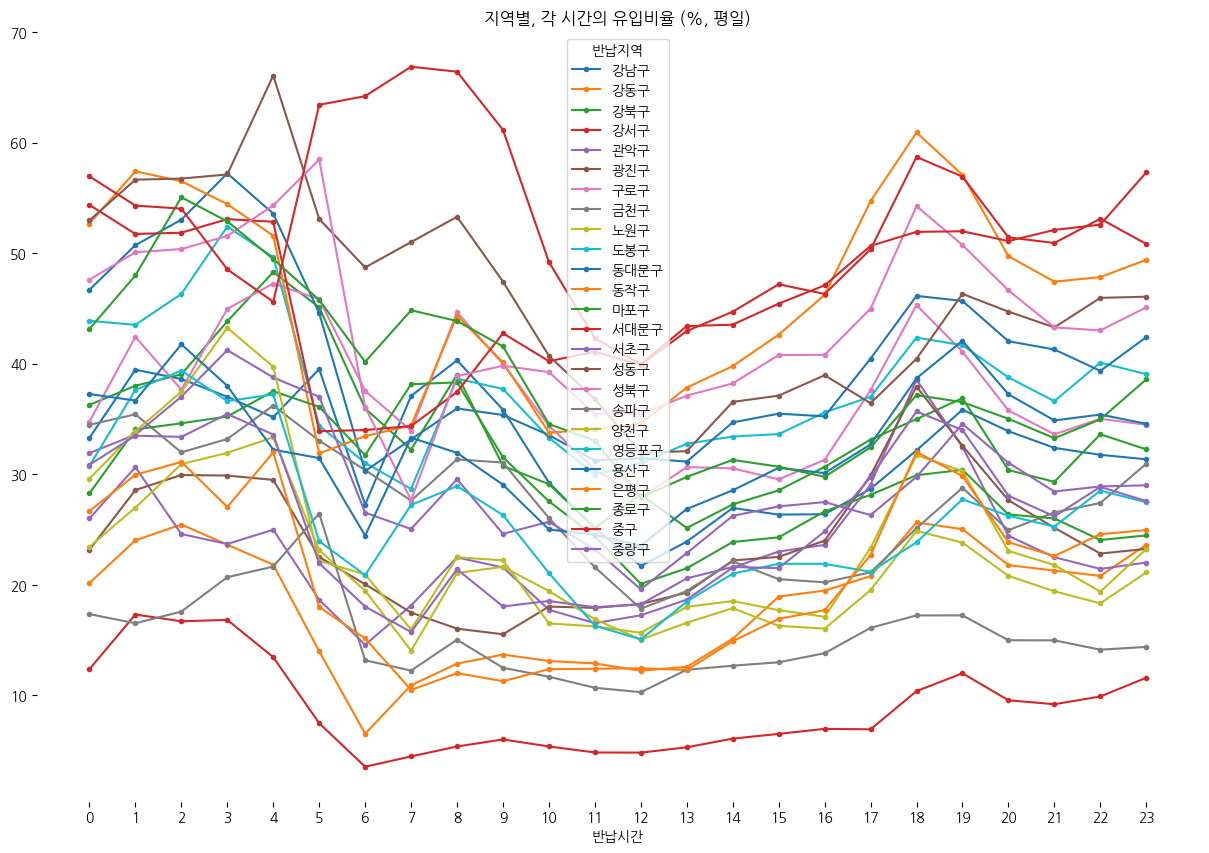

In [91]:
ax = inflow_by_region_weekday.T.plot.line(
    style='.-',
    rot=0,
    xticks=range(24),
    title="지역별, 각 시간의 유입비율 (%, 평일)",
    figsize=(15, 10)
)
ax.set_frame_on(False)

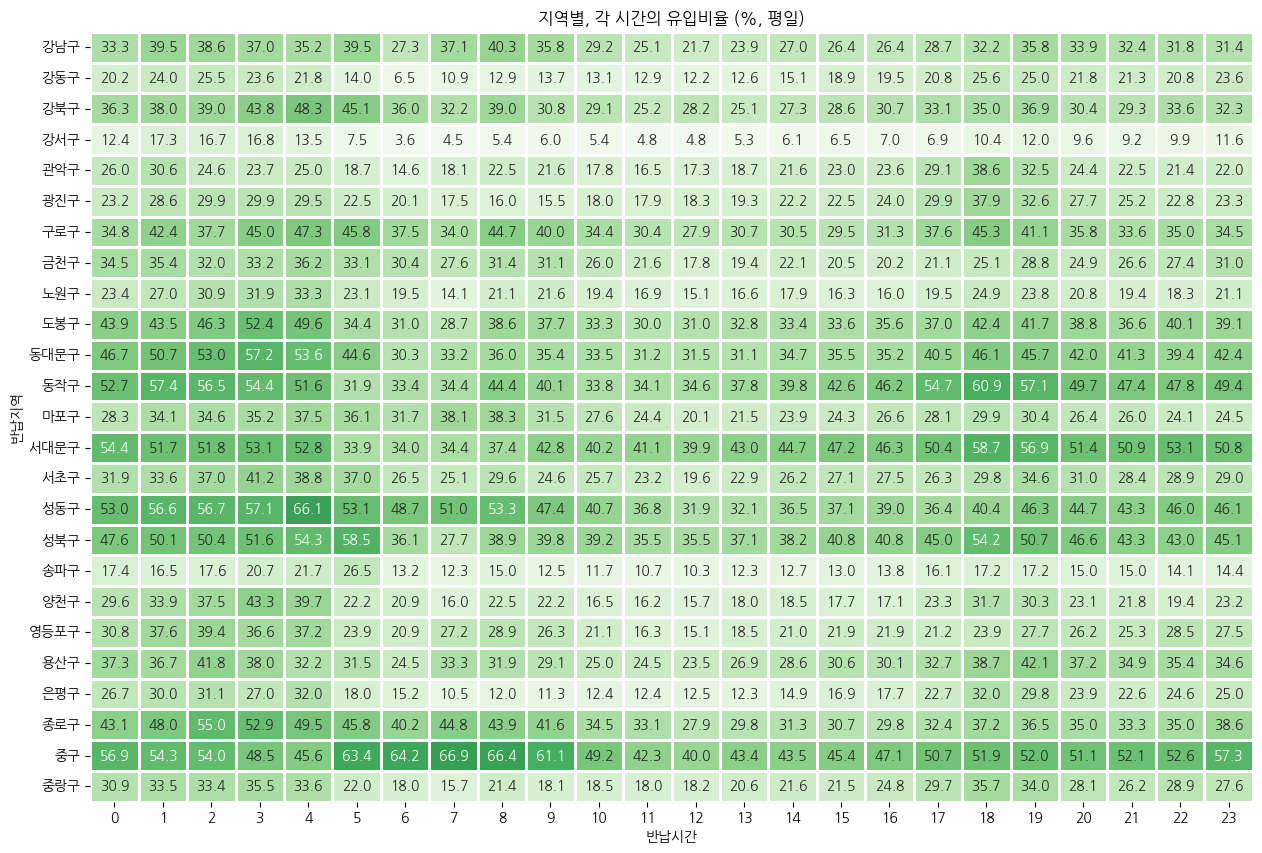

In [92]:
_, ax = plt.subplots(figsize=(15,10))
sns.heatmap(
    data=inflow_by_region_weekday,
    vmin=0,
    vmax=100,
    cmap='Greens',
    annot=True,
    fmt=".1f",
    linewidth=1,
    cbar=False,
    square=False,
    ax=ax
)
ax.set_title("지역별, 각 시간의 유입비율 (%, 평일)");

유입 비율에서 유출 비율을 뺀 값을 지표로 삼아 cluster map

In [93]:
inout_ratio = inflow_by_region_weekday - outflow_by_region_weekday
inout_ratio.head()

반납시간        0          1         2         3         4          5          6   \
반납지역                                                                            
강남구  -5.522160   3.837934  1.837478 -0.875574  1.690002   4.645171   2.013242   
강동구   1.890278   6.857549  9.312412  5.893819 -3.196545 -10.177722 -18.169913   
강북구  -3.127437   1.645022  2.001360  3.994734  3.949173  11.900865  -0.864124   
강서구   1.710259   5.447159  2.903738  0.106904 -1.471141   0.449528  -4.639618   
관악구   4.991433  10.520982  4.627957 -0.277952 -7.218300 -16.082983 -17.032906   

반납시간         7          8          9   ...        14        15         16  \
반납지역                                   ...                                  
강남구    7.427819  10.446822  14.282478  ... -3.333609 -7.106820 -10.492833   
강동구   -7.785938  -7.148134  -3.111828  ... -0.450683  3.020803   3.959545   
강북구   -3.321681   9.064162  -3.137372  ... -3.011000 -0.848256  -2.371824   
강서구   -3.051872   0.494890   0.440343  ... -0.983712 -0.312213  -0.348612   
관악구  -21.663297 -21.145300  -6.589416  ... -2.377227 -0.512592   0.456153   

반납시간         17         18         19        20        21        22         23  
반납지역                                                                            
강남구  -14.447351 -16.008727  -5.596731 -4.662827 -3.601326 -5.784654  -4.999883  
강동구    3.427933   8.826492  10.247994  5.524436  4.051983  6.995701  10.264898  
강북구    0.748774  -1.999842   5.036020 -0.651599 -3.033657 -1.346721  -4.212906  
강서구   -1.479084   1.419846   5.219913  2.771578  2.249908  2.760576   3.552003  
관악구    5.007357  13.871352  11.934905  2.840924  1.730451  0.723555   1.430002  

[5 rows x 24 columns]

/home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


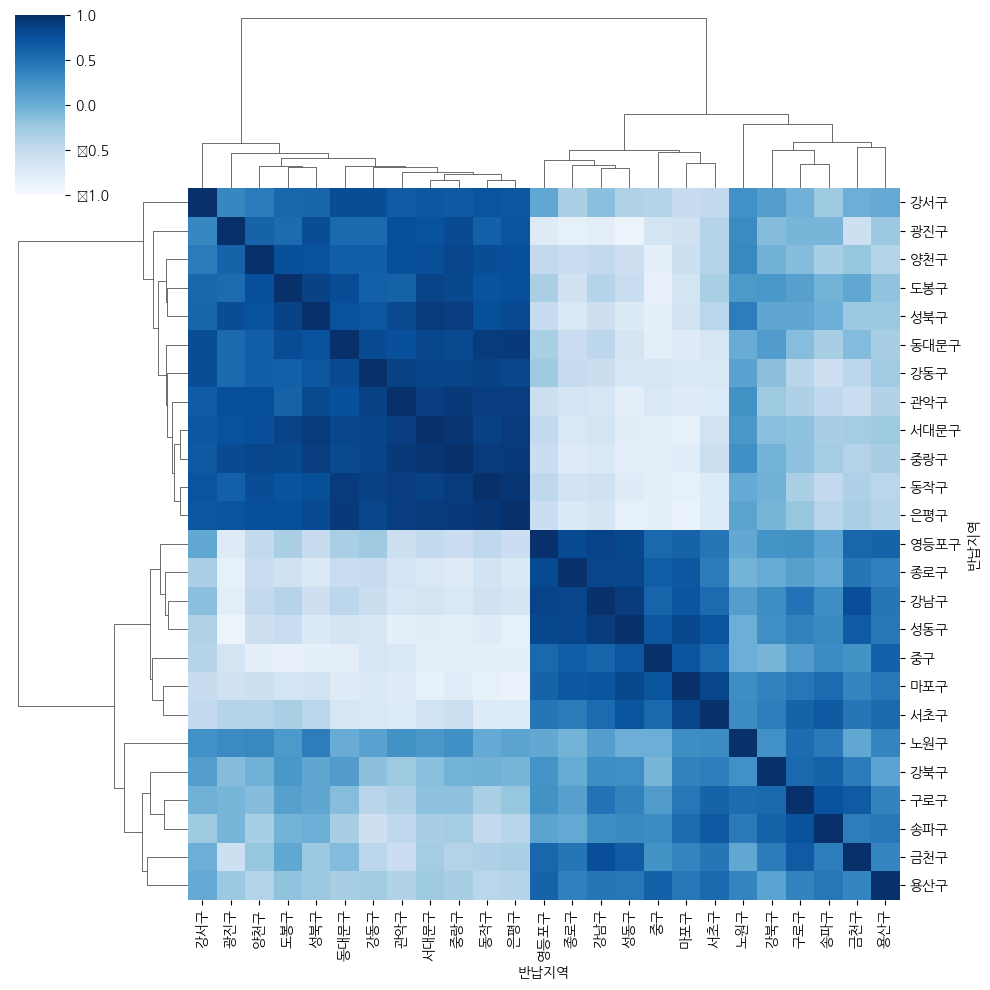

In [94]:
clustergrid = sns.clustermap(inout_ratio.T.corr(),
    cmap='Blues',
    vmin=-1,
    vmax=1,
    cbar=True
)

In [96]:
reordered_ind = clustergrid.dendrogram_row.reordered_ind
inout_ratio.index[reordered_ind]

Index(['강서구', '광진구', '양천구', '도봉구', '성북구', '동대문구', '강동구', '관악구', '서대문구', '중랑구',
       '동작구', '은평구', '영등포구', '종로구', '강남구', '성동구', '중구', '마포구', '서초구', '노원구',
       '강북구', '구로구', '송파구', '금천구', '용산구'],
      dtype='object', name='반납지역')

In [97]:

inout_ratio = inout_ratio.reindex(inout_ratio.index[reordered_ind])
# or inout_ratio.reset_index().reindex(reordered_ind).set_index('반납지역')
inout_ratio.head()

반납시간        0         1         2         3          4         5          6   \
반납지역                                                                           
강서구   1.710259  5.447159  2.903738  0.106904  -1.471141  0.449528  -4.639618   
광진구  -5.696194 -1.349770 -2.268374 -3.621495  -3.142261 -0.522595  -5.910524   
양천구   3.332829  4.166751  4.339189  5.417053  12.970935 -8.951974  -5.299759   
도봉구   4.569103  1.602919  1.610026  8.680575  12.437268  1.661977  -8.798267   
성북구   2.648646  4.110431  1.391269  7.894891   7.490984  3.784123 -18.708721   

반납시간         7          8          9   ...        14        15        16  \
반납지역                                   ...                                 
강서구   -3.051872   0.494890   0.440343  ... -0.983712 -0.312213 -0.348612   
광진구  -15.534666 -22.234655 -14.899995  ...  1.862815  1.172031  0.891332   
양천구   -9.611892  -6.938359  -3.391772  ...  0.822684  0.188957 -1.023746   
도봉구  -11.897277  -7.497114  -4.272111  ... -1.778570 -0.974833  0.801282   
성북구  -28.085986 -19.342637  -4.681309  ... -1.829588  2.510357  0.538330   

반납시간        17         18         19        20        21        22        23  
반납지역                                                                          
강서구  -1.479084   1.419846   5.219913  2.771578  2.249908  2.760576  3.552003  
광진구   5.507734  11.902917  10.137792  4.611047  1.707747  0.103607 -0.832476  
양천구   1.985421   8.979264  11.065789  3.069835  1.910076 -2.111554  0.943707  
도봉구  -0.712953   1.576711   8.819341  7.224374  5.896547  6.587012  3.162536  
성북구   2.989609  11.865749  11.139934  7.528674  6.208514  4.390322  2.724318  

[5 rows x 24 columns]

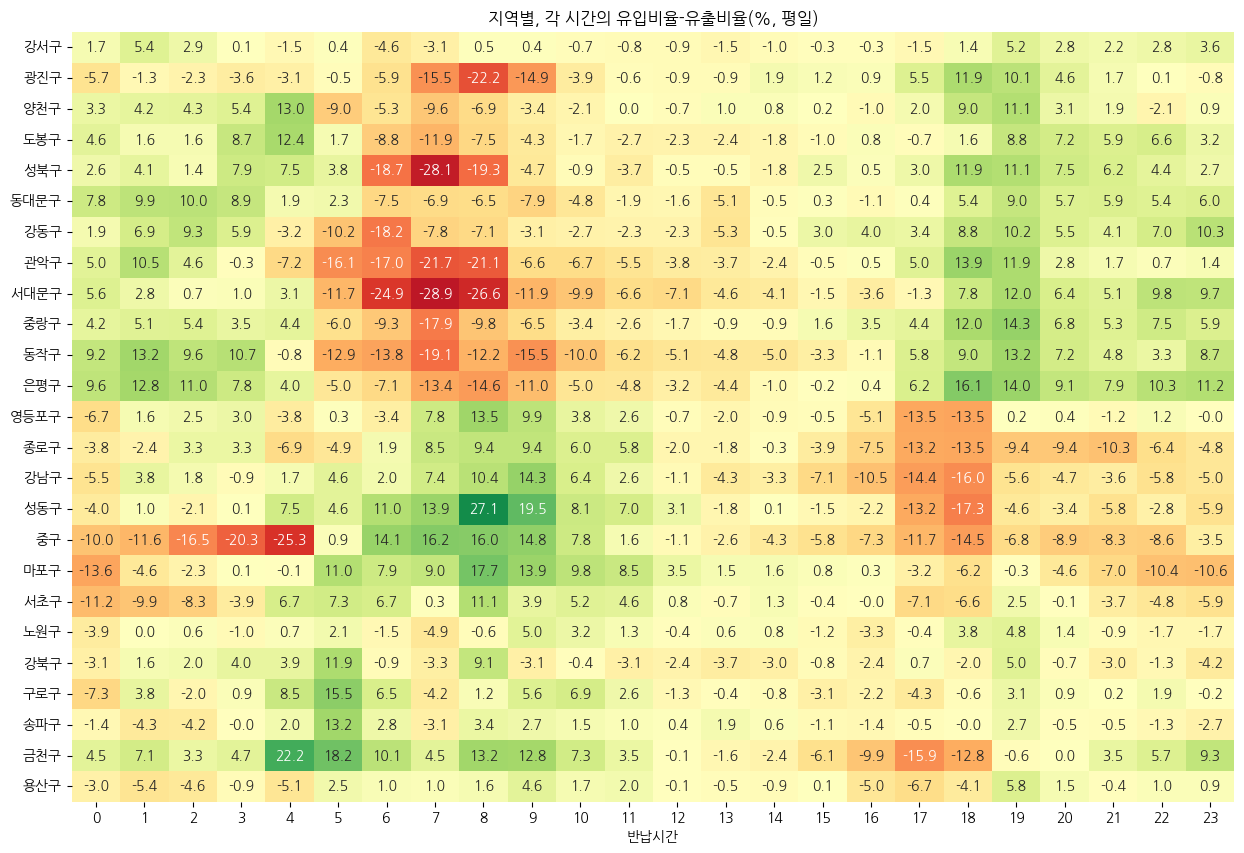

In [98]:
# [흠시] 시간에 따른 각 지역별 (유입 - 유출비율) 히트맵. 빨간색은 유출이 압도함을, 초록색은 유입이 압도함을 의미한다.

_, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(inout_ratio,
    vmin=-32,
    vmax=32,
    square=False,
    annot=True,
    fmt=".1f",
    cmap='RdYlGn', 
    cbar=False,
    ax=ax
)
ax.set_title("지역별, 각 시간의 유입비율-유출비율(%, 평일)")
ax.set_ylabel("");

사람들이 주로 출/퇴근하는 지역은?

In [99]:
# 출근시간대

mean_inout_morning = inout_ratio.iloc[:, 7:10].mean(axis=1)
mean_inout_morning

반납지역
강서구     -0.705546
광진구    -17.556438
양천구     -6.647341
도봉구     -7.888834
성북구    -17.369977
동대문구    -7.113145
강동구     -6.015300
관악구    -16.466004
서대문구   -22.476212
중랑구    -11.421925
동작구    -15.601871
은평구    -12.982382
영등포구    10.389028
종로구      9.111534
강남구     10.719039
성동구     20.181740
중구      15.637690
마포구     13.556578
서초구      5.080242
노원구     -0.171252
강북구      0.868370
구로구      0.895009
송파구      0.998731
금천구     10.176683
용산구      2.386988
dtype: float64

In [100]:
# 퇴근시간대

mean_inout_night = inout_ratio.iloc[:, 17:20].mean(axis=1)
mean_inout_night

반납지역
강서구      1.720225
광진구      9.182814
양천구      7.343491
도봉구      3.227700
성북구      8.665097
동대문구     4.933697
강동구      7.500806
관악구     10.271205
서대문구     6.141285
중랑구     10.232555
동작구      9.332046
은평구     12.084275
영등포구    -8.934047
종로구    -12.037023
강남구    -12.017603
성동구    -11.692164
중구     -10.969687
마포구     -3.263740
서초구     -3.721470
노원구      2.730271
강북구      1.261650
구로구     -0.574113
송파구      0.705176
금천구     -9.751822
용산구     -1.683911
dtype: float64

In [101]:
# 왼쪽은 출근시간대, 오른쪽은 퇴근시간대를 나타낸다.

bike_map = folium.plugins.DualMap(
    location=[37.541, 126.986],
    zoom_start=10,
    tiles='CartoDB positron',
    zoom_control=False
)
folium.Choropleth(geo_str,
    data=mean_inout_morning,
    key_on='feature.properties.SIG_KOR_NM', 
    fill_color='RdYlGn',
    line_color='grey'
).add_to(bike_map.m1)
folium.Choropleth(geo_str,
    data=mean_inout_night,
    key_on='feature.properties.SIG_KOR_NM', 
    fill_color='RdYlGn',
    line_color='grey'
).add_to(bike_map.m2)
bike_map

In [102]:
diff_inout_abs = (abs(mean_inout_morning) + abs(mean_inout_night)).sort_values()
diff_inout_abs

반납지역
구로구      1.469122
송파구      1.703907
강북구      2.130020
강서구      2.425771
노원구      2.901523
용산구      4.070899
서초구      8.801712
도봉구     11.116534
동대문구    12.046841
강동구     13.516106
양천구     13.990832
마포구     16.820319
영등포구    19.323075
금천구     19.928505
종로구     21.148557
중랑구     21.654481
강남구     22.736643
동작구     24.933917
은평구     25.066658
성북구     26.035075
중구      26.607377
관악구     26.737209
광진구     26.739253
서대문구    28.617496
성동구     31.873904
dtype: float64

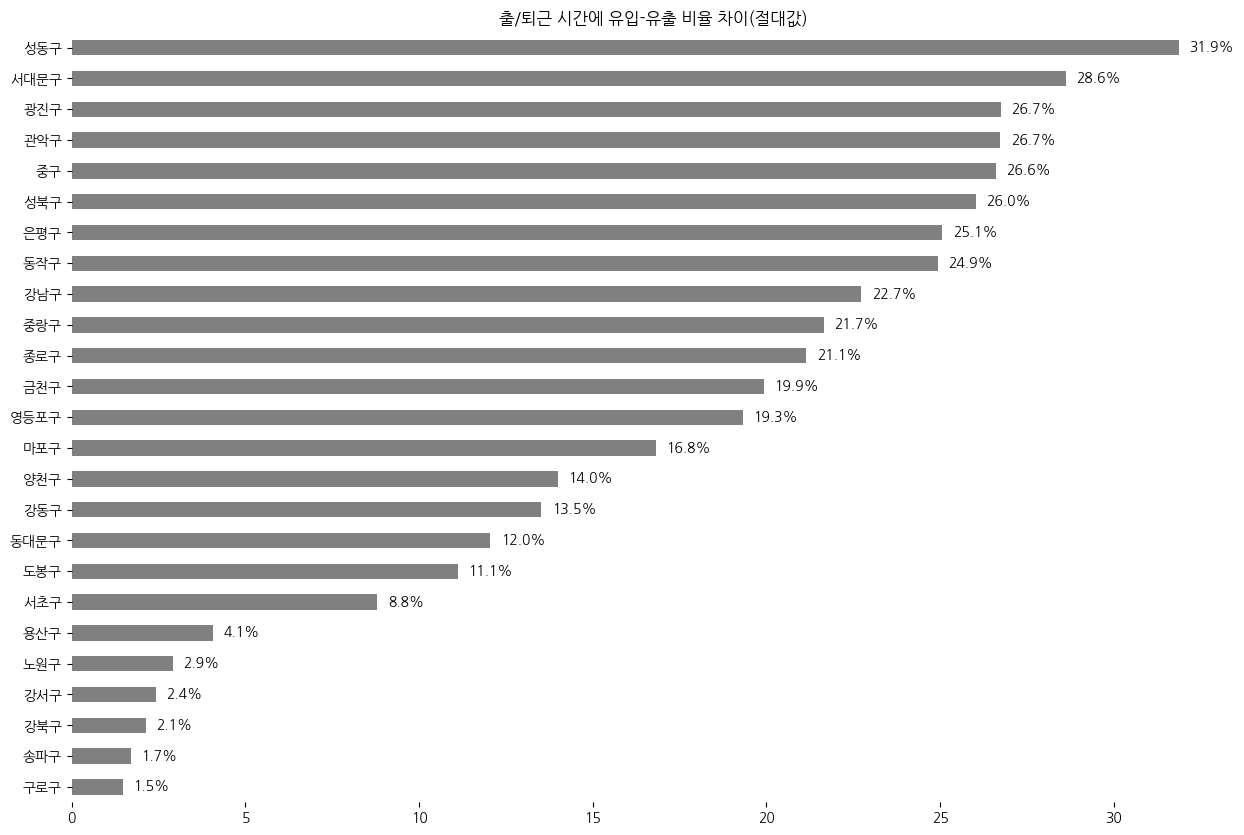

In [103]:
# 차이값이 큰 순으로 정렬

ax = diff_inout_abs.plot(
    kind='barh',
    rot=0,
    color='grey',
    xlabel="",
    ylabel="",
    title="출/퇴근 시간에 유입-유출 비율 차이(절대값)",
    figsize=(15, 10)
)
ax.set_frame_on(False)
for p in ax.patches: 
    x, y, width, height = p.get_bbox().bounds
    ax.text(width+0.3, y+height/2, f"{width:.1f}%", va='center')

In [104]:
# 색이 진할수록 값이 크다.
bike_map = folium.Map(
    location=[37.541, 126.986],
    zoom_start=10.8,
    tiles='CartoDB positron',
    zoom_control=False
)
folium.Choropleth(geo_str,
    data=diff_inout_abs,
    key_on='feature.properties.SIG_KOR_NM', 
    fill_color='Greys'
).add_to(bike_map)
bike_map

성동구의 문제를 해결하는 편이 낫다고 생각함

In [106]:
rental_df.loc[(rental_df['자치구']=='성동구')]

대여소번호       보관소(대여소)명  자치구                                상세주소  \
341     506    금호 어울림 아파트 앞  성동구                  서울특별시 성동구 광나루로 249   
342     507    성수아이에스비즈타워 앞  성동구                  서울특별시 성동구 성수이로 147   
343     508      성수아카데미타워 앞  성동구                  서울특별시 성동구 성수이로 118   
344     509     이마트 버스정류소 옆  성동구                   서울특별시 성동구 뚝섬로 379   
345     510  서울숲 남문 버스정류소 옆  성동구                 서울특별시 성동구 왕십리로11길 9   
...     ...             ...  ...                                 ...   
2345   4373      서울숲 지식산업센터  성동구  서울 성동구 성수일로 10. 서울숲 itct 지식산업센터 앞    
2346   4377       우영테크노센터 앞  성동구                        성동구 아차산로 144   
2347   4381       더스페이스타워 앞  성동구                        성동구 광나루로 144   
2348   4382    페코텍글로벌허브빌딩 앞  성동구                         성동구 동일로 169   
2349   4383        푸조비즈타워 앞  성동구                        성동구 광나루로 310   

             위도          경도  거치대개수  
341   37.549061  127.057793      7  
342   37.548203  127.057114      7  
343   37.545166  127.057510     10  
344   37.539654  127.052589     25  
345   37.541222  127.043800     15  
...         ...         ...    ...  
2345  37.541275  127.048492      8  
2346  37.543324  127.059715      8  
2347  37.551403  127.046364      8  
2348  37.547535  127.066826      7  
2349  37.548080  127.064613      4  

[87 rows x 7 columns]

In [ ]:
near_df_207=rental_df.loc[(rental_df['자치구']=='영등포구') & (rental_df['위도']<37.54) & (rental_df['위도']>37.52)& (rental_df['경도']>126.92) & (rental_df['경도']<126.95)]
near_df_207.shape

(23, 7)

In [ ]:
for row in near_df_207.itertuples():
    print(row)

In [ ]:
# 지도의 중심 찾기
from folium.plugins import MarkerCluster

lat=rental_df['위도'].mean()
long=rental_df['경도'].mean()
myMap = folium.Map([lat, long], zoom_start = 9)

coords = []
for i in range(len(rental_df)-1):
    x = rental_df['위도'][i]
    y = rental_df['경도'][i]
    coords.append([x, y])
    
for i in range(len(coords)):
    folium.Circle(
        location = coords[i],
        radius = 150,
        color = '#000000',
        fill = 'crimson',
    ).add_to(myMap)
    
folium.Marker([37.527157, 126.9319],
  popup="여의나루역 1번출구 앞",
  icon=folium.Icon(color='green', icon='fa-bicycle',prefix='fa')).add_to(myMap)

folium.CircleMarker([37.527157, 126.9319],
  radius=100,
  color='blue',
  fill_color='skyblue').add_to(myMap)

def plot(df):
    # 리스트를 이용해 여러 행의 데이터를 위,경도로 묶음
    locations = list(zip(df.위도, df.경도))
    # 반복문을 이용해 locations로 정의한 변수에 해당하는 위치에 자동차 모양의 빨간색 아이콘을 지정했다.
    icons = [folium.Icon(icon='fa-bicycle', prefix="fa", color="blue") for _ in range(len(locations))]

    # 역시 같은 원리로 아이콘을 클릭했을 때, 팝업이 생성되게 할 예정인데, 먼저 팝업 안에 들어갈 내용을 지정한다.
    popup_content = []
    for information in df.itertuples():
        # 팝업을 클릭했을 때, 시간이 나오게 하고 싶다.
        # datetime 컬럼을 pd.to_datetime 기능을 활용하여 hh:mm 포맷으로 time이라는 컬럼을 사전에 미리 만들었다.
        content = "<b>대여소번호 :{}</b>  <br /> 대여소명: {}".format(information.대여소번호, information._2)
        popup_content.append(content)

    # 팝업을 생성한다.
    popups = [folium.Popup(content, min_width=300, max_width=300) for content in popup_content]

    # 클러스터를 생성하여 앞에서 지정한 locations, icons, popups를 설정해준다.
    cluster = MarkerCluster(locations = locations, icons = icons, popups = popups,)
    # 지도에 클러스터를 추가.
    cluster.add_to(myMap)
    
plot(near_df_207)
myMap.save('index.html')

In [ ]:
# 대여량이 많은 상위 대여소 
# for i in range(5):
#     print('반납량 많은 상위 대여소 top 10\n',df[i]['반납대여소이름'].value_counts().head(5))
print('반납량 많은 상위 대여소 top 10\n',df_return.sort_values('반납수',ascending=False))

반납량 많은 상위 대여소 top 10
             반납대여소이름  반납대여소    반납수
778   뚝섬유원지역 1번출구 앞    502  81191
2454     한강공원 망원나들목   4217  75121
1831   여의나루역 1번출구 앞    207  67325
834     마곡나루역 2번 출구   2715  65651
1110        봉림교 교통섬   2102  52390
...             ...    ...    ...
2042          위트콤공장     11      4
2398        테스트 대여소   9979      3
2041            위트콤     10      3
1252         상암단말정비  99998      2
100           _도봉센터   9990      1

[2632 rows x 3 columns]


In [ ]:
# df_return_group = df_2022.groupby(["반납대여소이름","반납대여소"])["반납일시"].count()
# df_return = pd.DataFrame(df_return_group).reset_index()
# df_return.columns = ["반납대여소이름","반납대여소", "반납수"]
# df_return

## 2018년 데이터 전처리 및 2018-2022 데이터(garbage code)

In [ ]:
# bike_path='data/'
# bike_list=os.listdir(bike_path)
# df=[]
# for file in bike_list:
#     file_path=os.path.join(bike_path,file)
#     file_name='bike_'+file_path.split('.')[0][-4:]
#     file_name=pd.read_csv(file_path,low_memory=False)
#     df.append(file_name)

# weather_path='weather/'
# weather_list=os.listdir(weather_path)
# weather_df=[]
# for file in weather_list:
#     file_path=os.path.join(weather_path,file)
#     file_name='weather_'+file_path.split('.')[0][-4:]
#     file_name=pd.read_excel(file_path)
#     weather_df.append(file_name)
# print(df[4]['대여대여소이름'].dtypes)
# df[4]['대여대여소이름']=df[4]['대여대여소이름'].astype('object')
# df[4]['대여대여소이름']=df[4]['대여대여소이름'].str.replace("'","")
# #2018
# df[4].head()
# df[4]['대여대여소이름']=df[4]['대여대여소이름'].str.strip()